In [31]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
# df = pd.read_csv("d:\Users\tanap\Downloads\Crime_Data_from_2020_to_Present.csv")

data = df[['DATE OCC', 'AREA NAME']].sort_values(by='DATE OCC', ascending=True)

In [10]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

data

C:\Users\tanap\AppData\Local\Temp\ipykernel_10576\3464957308.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


,DATE OCC,AREA NAME
122811,2020-01-01,Newton
131832,2020-01-01,Newton
81354,2020-01-01,Van Nuys
131982,2020-01-01,Topanga
81124,2020-01-01,West Valley
...,...,...
456233,2022-12-31,Pacific
540940,2022-12-31,Hollenbeck
629819,2022-12-31,Southeast
485493,2022-12-31,Olympic


This line of code is converting the 'DATE OCC' column of the `data` DataFrame into a datetime format using the `pd.to_datetime()` function from the pandas library in Python.

Here's a breakdown:

- `data['DATE OCC']`: This is selecting the 'DATE OCC' column from the `data` DataFrame.
- `pd.to_datetime()`: This is a function from the pandas library that converts a series of string representations of dates (or other date formats) into a series of datetime format.
- `data['DATE OCC'] = ...`: This is assigning the converted datetime series back to the 'DATE OCC' column in the `data` DataFrame. 

So, after this line of code is executed, the 'DATE OCC' column in the `data` DataFrame will be in datetime format, which is useful for date-based computations and analysis.

In [11]:
data.value_counts()

DATE OCC    AREA NAME  
2020-05-30  Wilshire       327
2020-05-29  Central        175
2020-05-30  Central        114
2023-08-06  Southwest      114
2023-02-02  77th Street    111
                          ... 
2023-10-09  Rampart          3
            Foothill         3
            West Valley      3
            Devonshire       2
            N Hollywood      1
Name: count, Length: 28937, dtype: int64

In [12]:
table = data.pivot_table(index='DATE OCC', columns='AREA NAME', aggfunc='size', fill_value=0)

table


AREA NAME,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2020-01-01,82,55,53,46,45,40,62,64,57,59,...,47,42,66,66,49,59,41,38,41,41
2020-01-02,34,38,24,16,31,15,26,24,27,25,...,24,27,24,28,29,15,31,23,21,25
2020-01-03,53,42,18,32,28,31,21,28,34,21,...,21,32,25,23,28,25,23,23,36,31
2020-01-04,39,38,25,19,18,22,24,18,18,32,...,20,31,19,31,43,31,22,21,17,27
2020-01-05,46,30,24,16,27,29,21,17,28,26,...,17,24,21,27,31,23,26,22,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,29,25,13,14,14,15,20,13,26,14,...,28,19,34,26,32,10,27,21,23,14
2023-10-06,25,30,16,18,24,19,27,23,19,30,...,20,22,15,25,25,18,22,18,10,16
2023-10-07,20,38,18,16,14,16,17,15,13,27,...,25,23,19,27,28,20,13,14,18,13


In [13]:
# data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
weekly_data = data.resample('W-Mon', on='DATE OCC').sum()
weekly_data


,AREA NAME
DATE OCC,
2020-01-06,NewtonNewtonVan NuysTopangaWest ValleyFoothill...
2020-01-13,SoutheastMissionWilshire77th StreetOlympicTopa...
2020-01-20,OlympicWest ValleyRampartWest LARampartRampart...
2020-01-27,OlympicHollenbeckHollenbeckMissionDevonshireTo...
2020-02-03,NortheastCentralHarborTopangaPacificSouthwestH...
...,...
2023-09-11,FoothillN HollywoodSoutheastWilshireWilshireHo...
2023-09-18,Van NuysCentralNewtonPacificTopanga77th Street...
2023-09-25,WilshireWilshireHollenbeckRampartSouthwestMiss...


In [14]:
# data.set_index('DATE OCC', inplace=True)

In [15]:
# weekly_counts_by_area = data.resample('W-Mon')

# weekly_counts_by_area

In [16]:
data.drop('NAME', axis=1, inplace=True)

KeyError: "['NAME'] not found in axis"

In [22]:
data = df

data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
815878,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
815879,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
815880,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [23]:
data['Weapon Desc'].replace("AXE", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("CLEAVER", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("FOLDING KNIFE", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("KITCHEN KNIFE", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("KNIFE WITH BLADE 6INCHES OR LESS", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("KNIFE WITH BLADE OVER 6 INCHES IN LENGTH", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("MACHETE", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("OTHER CUTTING INSTRUMENT", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("OTHER KNIFE", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("RAZOR", "SHARP OBJECTS", inplace=True, regex=True)
data['Weapon Desc'].replace("RAZOR BLADE", "SHARP OBJECTS", inplace=True, regex=True)

data['Weapon Desc'].replace("AIR PISTOL/REVOLVER/RIFLE/BB GUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("ANTIQUE FIREARM", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("ASSAULT WEAPON/UZI/AK47/ETC", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("AUTOMATIC WEAPON/SUB-MACHINE GUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("HAND GUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("OTHER FIREARM", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("REVOLVER", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("RIFLE", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("SAWED OFF RIFLE/SHOTGUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("SEMI-AUTOMATIC PISTOL", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("SEMI-AUTOMATIC RIFLE", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("SHOTGUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("SIMULATED GUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("STARTER PISTOL/REVOLVER", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("TOY GUN", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("UNKNOWN FIREARM", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("UNKNOWN TYPE CUTTING INSTRUMENT", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("UNKNOWN WEAPON/OTHER WEAPON", "FIREARM", inplace=True, regex=True)
data['Weapon Desc'].replace("UZI SEMIAUTOMATIC ASSAULT RIFLE", "FIREARM", inplace=True, regex=True)

In [24]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
815878,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
815879,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
815880,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


<Axes: xlabel='Weapon Desc', ylabel='Vict Age'>

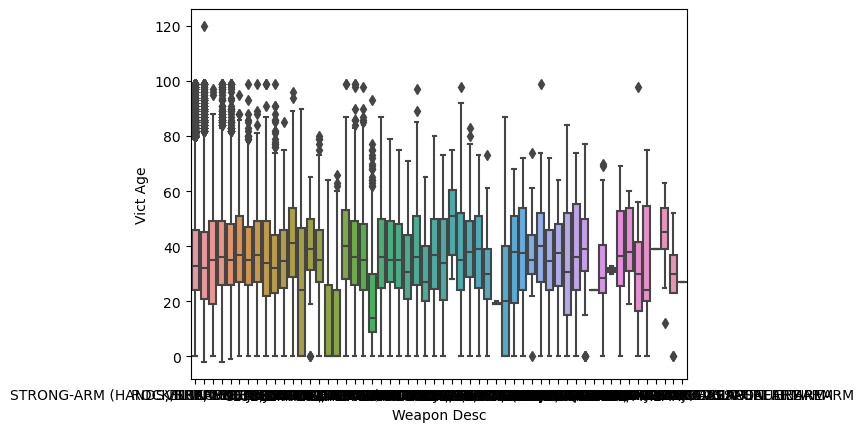

In [33]:
sns.boxplot(data=data, x='Weapon Desc', y='Vict Age')